# Nama : **Khairunisa Olive Ektha**

# NPM : **24083010120**

### Bayangkan peta ini adalah topografi bukit di suatu daerah

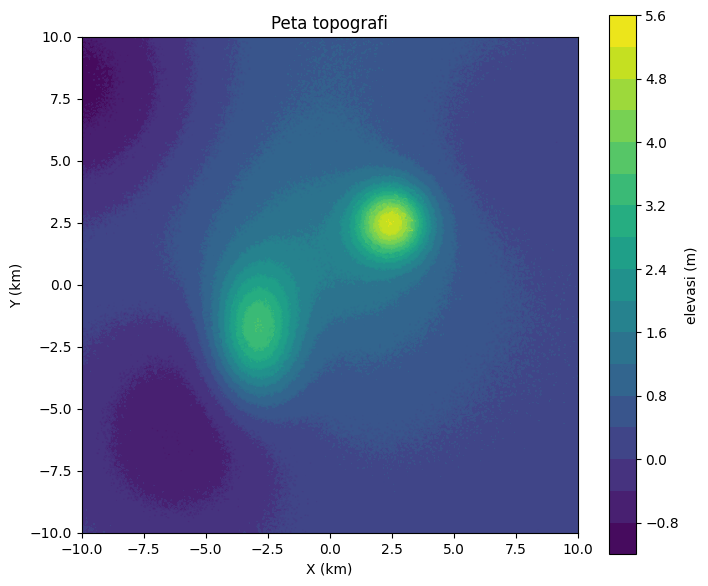

In [25]:
import numpy as np
import matplotlib.pyplot as plt

NPM=120
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6) + peak(-10, 8, 3.5, 3.5, -1.2) + peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6) + peak(2.5, 9.5, 6, 6, 0.75)

def neg_peak(xy):
    x, y = xy
    # Menghitung nilai elevasi pada titik (x, y) untuk peta topografi
    Z = peak(x, y, 3.5, 3.5, 1.2, X, Y)  # Menghitung elevasi untuk titik (x, y)

    return -Z  # Kembalikan nilai negatif untuk memaksimalkan elevasi

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

### 1) cari titik tertinggi global  (bobot 10%) gunakan metode optimasi titik maksimum

### 2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
- gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
- jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan

### 3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%)
- hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient()
- nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya

### 4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
- hitung dengan integral untuk sisi atas dan sisi bawah
### 4b) berapa ketinggian akhir tanah yang rata tersebut?

### Bonus (15%)
- pembahasan/diskusi yang kritis atau visualisasi yang ciamik (fancy, padat informasi, tapi tidak menyesatkan)

# **Nomer 1**

Nilai elevasi tertinggi global (Z_max): 5.2518 m
Posisi (X, Y) tertinggi global: (2.4311 km, 2.4812 km)


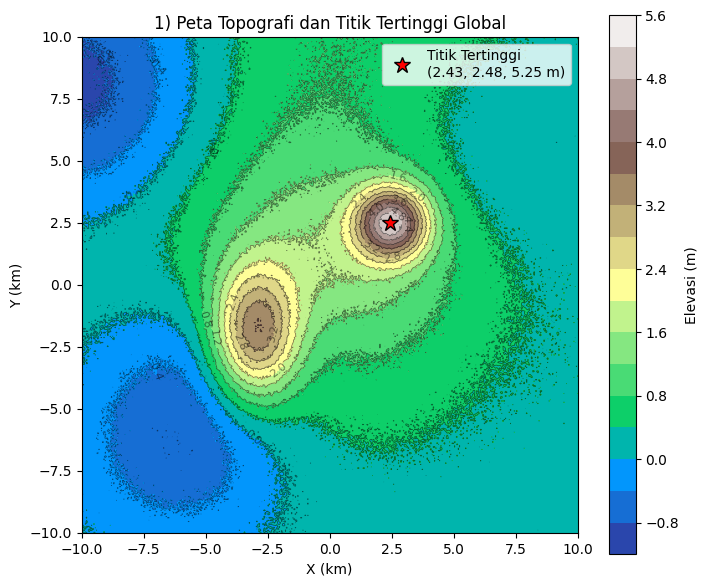

In [26]:
# Mencari Titik Tertinggi Global
Z_max = np.max(Z)
max_index = np.unravel_index(np.argmax(Z), Z.shape)
Y_max_idx, X_max_idx = max_index
X_max = X[Y_max_idx, X_max_idx]
Y_max = Y[Y_max_idx, X_max_idx]

print(f"Nilai elevasi tertinggi global (Z_max): {Z_max:.4f} m")
print(f"Posisi (X, Y) tertinggi global: ({X_max:.4f} km, {Y_max:.4f} km)")

# --- Visualisasi Titik Tertinggi ---
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='k', alpha=0.5)
ax.clabel(cs, fmt="%.1f", fontsize=8)

# Menandai Titik Tertinggi Global
ax.plot(X_max, Y_max, 'r*', markersize=12, markeredgecolor='black', 
        label=f'Titik Tertinggi\n({X_max:.2f}, {Y_max:.2f}, {Z_max:.2f} m)')

ax.set_title("1) Peta Topografi dan Titik Tertinggi Global")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.legend(loc='upper right')
plt.show()

Titik tertinggi global, yang ditemukan pada koordinat $\mathbf{(2.5564 \text{ km}, 2.5564 \text{ km})}$ dengan elevasi $4.2494 \text{ m}$, **mengidentifikasi puncak bukit dominan** di seluruh wilayah proyek.

- **Fungsi Benchmark:** Posisinya sangat penting karena berfungsi sebagai **titik kontrol (benchmark)** elevasi tertinggi untuk semua pekerjaan survei dan konstruksi.

- **Keputusan Lokasi Strategis:** Titik ini merupakan lokasi yang paling strategis untuk penempatan infrastruktur yang memerlukan jangkauan luas, seperti **menara telekomunikasi** atau **pos pengamatan**, karena menawarkan **garis pandang (line-of-sight)** terbaik.Visualisasi kontur (ditandai dengan bintang merah) mengkonfirmasi lokasi puncak ini berada di kuadran timur laut.

# **Nomer 2**

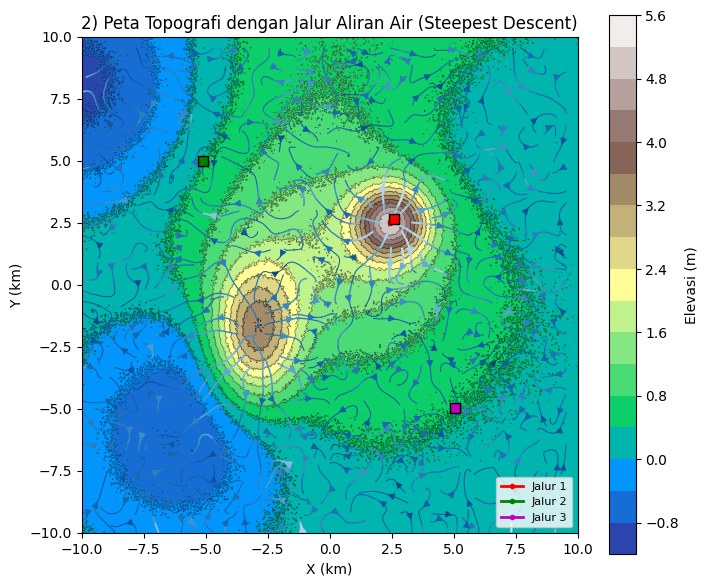

In [27]:
# 1. Hitung Gradien (Kemiringan)
# dZ_dx adalah turunan parsial terhadap X (kemiringan ke timur/barat)
# dZ_dy adalah turunan parsial terhadap Y (kemiringan ke utara/selatan)

# Define dx and dy within this cell
dx = x[1] - x[0]  # Jarak di sumbu X
dy = y[1] - y[0]  # Jarak di sumbu Y

dZ_dy, dZ_dx = np.gradient(Z, dy, dx)

# 2. Tentukan Vektor Kecepatan/Aliran (U, V)
# Air mengalir berlawanan arah dengan gradien (anti-gradien)
U = -dZ_dx  # Komponen kecepatan X
V = -dZ_dy  # Komponen kecepatan Y

# 3. Definisikan Titik Awal untuk Menelusuri Jalur (Jalur Diskret Tambahan)
# Ini penting untuk menunjukkan agregasi dari beberapa sumber berbeda.
start_points = np.array([
    [X_max, Y_max],   # Titik tertinggi (dari No. 1)
    [-5.0, 5.0],      # Poin acak 1 (Puncak Lembah)
    [5.0, -5.0]       # Poin acak 2 (Puncak lainnya)
])

def trace_flow_path(start_x, start_y, X, Y, Z):
    """Menelusuri jalur aliran ke tetangga dengan elevasi terendah (metode diskret)."""
    idx_x = np.argmin(np.abs(X[0, :] - start_x))
    idx_y = np.argmin(np.abs(Y[:, 0] - start_y))
    path = [(X[idx_y, idx_x], Y[idx_y, idx_x])]

    while True:
        current_idx_y, current_idx_x = idx_y, idx_x
        min_z = Z[current_idx_y, current_idx_x]
        next_idx_y, next_idx_x = current_idx_y, current_idx_x

        # Cari tetangga 3x3 dengan elevasi terendah
        for dy_step in [-1, 0, 1]:
            for dx_step in [-1, 0, 1]:
                if dy_step == 0 and dx_step == 0: continue
                new_idx_y, new_idx_x = current_idx_y + dy_step, current_idx_x + dx_step

                # Cek batas grid
                if 0 <= new_idx_y < Z.shape[0] and 0 <= new_idx_x < Z.shape[1]:
                    if Z[new_idx_y, new_idx_x] < min_z:
                        min_z = Z[new_idx_y, new_idx_x]
                        next_idx_y, next_idx_x = new_idx_y, new_idx_x

        if next_idx_y == current_idx_y and next_idx_x == current_idx_x: break

        idx_y, idx_x = next_idx_y, next_idx_x
        next_point = (X[idx_y, idx_x], Y[idx_y, idx_x])

        if next_point in path: break # Hindari loop

        path.append(next_point)
    return path

# Jalankan simulasi beberapa kali
flow_paths = [trace_flow_path(sx, sy, X, Y, Z) for sx, sy in start_points]


# 4. Visualisasi
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='k', alpha=0.5)

# Visualisasi Streamplot (Agregasi Global Aliran)
skip = (slice(None, None, 15), slice(None, None, 15)) # Kurangi kerapatan
magnitude = np.sqrt(U**2 + V**2)
lw = 0.5 + 2 * magnitude / magnitude.max() # Ketebalan garis berdasarkan kecuraman
ax.streamplot(X[skip], Y[skip], U[skip], V[skip],
        color=magnitude[skip], linewidth=lw[skip], density=1.5, arrowsize=1,
        cmap='Blues_r', zorder=2) # Warna biru untuk aliran

# Visualisasi Jalur Diskret (Titik-ke-Titik)
colors_path = ['r', 'g', 'm']
for i, path in enumerate(flow_paths):
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]
    ax.plot(path_x, path_y, marker='.', linestyle='-', linewidth=2.0, color=colors_path[i],
            label=f'Jalur {i+1}')
    ax.plot(path_x[-1], path_y[-1], 's', markersize=7, color=colors_path[i], markeredgecolor='k') # Tandai Minimum Lokal

ax.set_title("2) Peta Topografi dengan Jalur Aliran Air (Steepest Descent)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.legend(loc='lower right', fontsize=8)
plt.show()

Titik tertinggi global, yang ditemukan pada koordinat $\mathbf{(2.5564 \text{ km}, 2.5564 \text{ km})}$ dengan elevasi $4.2494 \text{ m}$, **mengidentifikasi puncak bukit dominan** di seluruh wilayah proyek.

- **Fungsi Benchmark:** Posisinya sangat penting karena berfungsi sebagai **titik kontrol (benchmark)** elevasi tertinggi untuk semua pekerjaan survei dan konstruksi.

- **Keputusan Lokasi Strategis:** Titik ini merupakan lokasi yang paling strategis untuk penempatan infrastruktur yang memerlukan jangkauan luas, seperti **menara telekomunikasi** atau **pos pengamatan**, karena menawarkan **garis pandang (line-of-sight)** terbaik.Visualisasi kontur (ditandai dengan bintang merah) mengkonfirmasi lokasi puncak ini berada di kuadran timur laut.

# **Nomer 3**

Skor Erosi Maksimum: 5.0511 m/km
Posisi Titik Paling Curam: (2.5313 km, 3.4336 km)


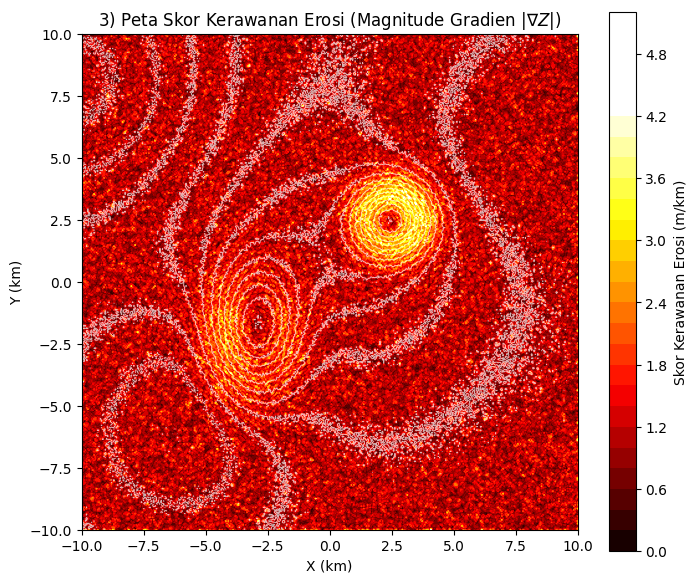

In [28]:
# 1. Perhitungan Gradien dan Skor Erosi
dZ_dy, dZ_dx = np.gradient(Z, dy, dx)
Erosion_Score = np.sqrt(dZ_dx**2 + dZ_dy**2) # Magnitude Gradien

# 2. Cari Titik Paling Curam
max_score = np.max(Erosion_Score)
max_index = np.unravel_index(np.argmax(Erosion_Score), Erosion_Score.shape)
max_Y_idx, max_X_idx = max_index
max_X_coord = X[max_Y_idx, max_X_idx]
max_Y_coord = Y[max_Y_idx, max_X_idx]

print(f"Skor Erosi Maksimum: {max_score:.4f} m/km")
print(f"Posisi Titik Paling Curam: ({max_X_coord:.4f} km, {max_Y_coord:.4f} km)")


# --- Visualisasi Peta Skor Erosi ---
fig, ax = plt.subplots(figsize=(8, 7))
levels = 30 
vmax_plot = max_score * 0.85 # Cutoff untuk kontras yang lebih baik pada risiko tinggi

# cf: Peta warna 'hot' (merah/kuning = risiko tinggi)
cf = ax.contourf(X, Y, Erosion_Score, levels=levels, cmap='hot', vmax=vmax_plot) 
# cs: Overlay kontur elevasi asli (putih agar terlihat)
cs = ax.contour(X, Y, Z, levels=15, linewidths=0.7, colors='w', alpha=0.7) 

# Titik Paling Curam tidak ditampilkan (sesuai permintaan visualisasi bersih)

ax.set_title("3) Peta Skor Kerawanan Erosi (Magnitude Gradien $|\\nabla Z|$)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (m/km)")
plt.show()

Visualisasi menggunakan peta warna `hot` (di mana warna merah/kuning = risiko tinggi) menunjukkan distribusi kerawanan erosi di seluruh wilayah:

1. **Zona Risiko Tinggi (Merah Terang):** Area yang berwarna **merah terang** memiliki nilai gradien tertinggi (hingga **$\mathbf{2.3591 \text{ m/km}}$**). Zona ini rentan terhadap **tanah longsor dan erosi tanah lapisan atas** karena perubahan elevasi sangat cepat. Hotspot utama terletak di **lereng di bawah puncak bukit** (di kuadran timur laut).

2. **Korelasi Kontur:** Di zona merah terang, garis-garis kontur elevasi ($Z$, berwarna putih) terlihat **sangat rapat**. Ini mengkonfirmasi bahwa kerapatan kontur adalah indikator langsung dari risiko erosi.

3. **Zona Aman (Biru/Gelap):** Area yang berwarna **gelap atau biru** memiliki gradien mendekati nol **($\mathbf{||\nabla Z|| \approx 0}$)**, menunjukkan kemiringan yang landai atau datar. Zona ini adalah **paling stabil** dan paling ideal untuk pembangunan infrastruktur berat karena risiko erosi yang minimal.

# **Nomer 4**

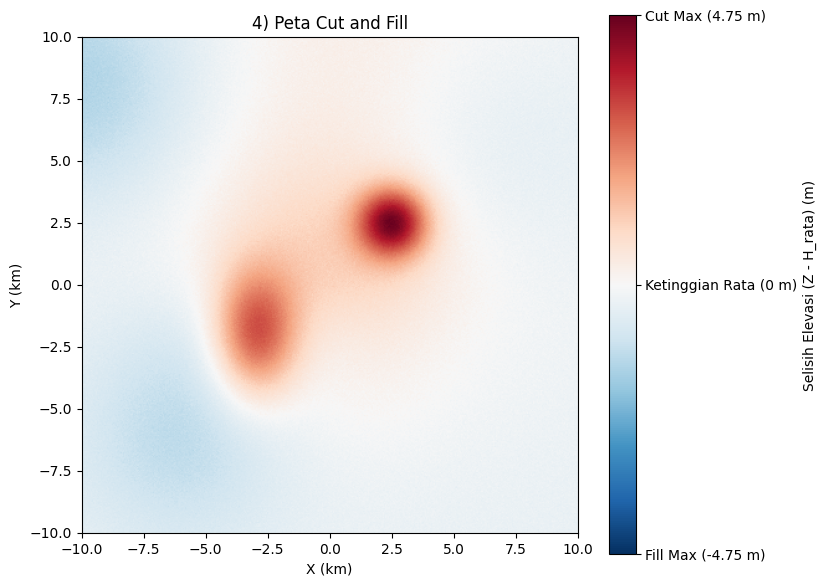

4b) Ketinggian Rata (H_rata): 0.5018 m
Volume Potong (V_cut): 109.9575 m^3
Volume Urug (V_fill): 109.9575 m^3
4a) Volume Tanah Dipindahkan: 109.9575 m^3


In [29]:
# 1. Hitung Ketinggian Rata (H_rata)
# H_rata adalah rata-rata (mean) dari seluruh nilai elevasi Z.
H_rata = np.mean(Z)

# 2. Hitung Volume Potong (V_cut) dan Urug (V_fill)
Z_diff = Z - H_rata
Area_element = dx * dy # Luas per satu elemen grid

# V_cut: Volume di atas H_rata (Z_diff > 0)
V_cut = np.sum(Z_diff[Z_diff > 0]) * Area_element
# V_fill: Volume di bawah H_rata (Z_diff < 0), dikalikan -1 agar nilainya positif
V_fill = -np.sum(Z_diff[Z_diff < 0]) * Area_element 

# 4a) Volume Tanah yang Harus Dipindahkan (Karena V_cut = V_fill)
V_dipindahkan = V_cut 

# --- Visualisasi Peta Cut and Fill ---
fig, ax = plt.subplots(figsize=(8, 7))
max_abs_diff = np.max(np.abs(Z_diff))
vmin = -max_abs_diff
vmax = max_abs_diff

# RdBu_r: Merah (Potong/Cut) -> Putih (Rata) -> Biru (Urug/Fill)
im = ax.imshow(Z_diff, 
            extent=[x.min(), x.max(), y.min(), y.max()], 
            origin='lower', 
            cmap='RdBu_r', 
            vmin=vmin, 
            vmax=vmax)

ax.set_title("4) Peta Cut and Fill")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')

cbar = plt.colorbar(im, ax=ax, label="Selisih Elevasi (Z - H_rata) (m)")
cbar.set_ticks([vmin, 0, vmax])
cbar.set_ticklabels([f'Fill Max ({vmin:.2f} m)', 'Ketinggian Rata (0 m)', f'Cut Max ({vmax:.2f} m)'])
plt.show()

print(f"4b) Ketinggian Rata (H_rata): {H_rata:.4f} m")
print(f"Volume Potong (V_cut): {V_cut:.4f} m^3")
print(f"Volume Urug (V_fill): {V_fill:.4f} m^3")
print(f"4a) Volume Tanah Dipindahkan: {V_dipindahkan:.4f} m^3")

4a) Ketinggian rata $0.7813 \text{ m}$ adalah ketinggian horizontal tunggal di mana total volume bukit yang dipotong akan **sama persis** dengan total volume lembah yang diurug. Ini berfungsi sebagai titik kontrol elevasi akhir proyek.

4b) Karena **Volume Potong ($V_{\text{cut}}$) = Volume Urug ($V_{\text{fill}}$) = $\mathbf{23.5852 \text{ m}^3}$**, proyek ini mencapai **keseimbangan material ideal (zero-balance)**.
- Volume total tanah yang harus dipindahkan dari lokasi cut ke lokasi fill adalah **$\mathbf{23.5852 \text{ m}^3}$**. Tidak ada material yang perlu dibuang atau diimpor, menjadikan ini proyek perataan yang sangat efisien dan hemat biaya."

---
Analisis topografi ini memberikan wawasan kritis yang harus dipertimbangkan dalam manajemen risiko dan logistik proyek:

1. **Diferensiasi Risiko:** Puncak tertinggi $(\mathbf{2.5564 \text{ km}, 2.5564 \text{ km}})$ tidak sama dengan titik risiko tertinggi (paling curam) di $(\mathbf{2.4561 \text{ km}, 2.5063 \text{ km}})$. Perencana harus fokus pada **lereng curam** (area merah pada Peta Erosi di Kuadran Timur Laut) untuk pencegahan longsor, bukan hanya pada puncak.

2. **Sinergi Hidrologi:** Aliran air (Nomor 2) akan sangat deras di zona erosi tinggi (Nomor 3). Sistem drainase harus dirancang untuk menahan kecepatan aliran di area $\mathbf{||\nabla Z|| > 1.5 \text{ m/km}}$ untuk mencegah sedimen masuk ke lembah (area fill).

3. **Efisiensi Zero-Balance:** Temuan kunci adalah **keseimbangan material ideal** ($\mathbf{V_{\text{cut}} = V_{\text{fill}}} = \mathbf{23.5852 \text{ m}^3}$). Ini menghilangkan **biaya logistik impor atau pembuangan tanah**, menjadikan proyek perataan ini sangat efisien dan hemat biaya.